# Load Dataset and Visualize Top 5 Records

In [1]:
import pandas as pd 

def print_line(sym="=", times=100):
    print(f"\n{sym*times}\n") 
    
insurance_df = pd.read_csv(r"insurance.csv")

# Round charges. 
insurance_df['charges'] = [round(charges,2) for charges in insurance_df['charges']]


# Statistical Analysis
**Important**

Key points to emphasize here include the count of values, minimum value, standard deviation, and maximum value.

In [26]:
print_line()
print(f"Number of Sampels: {insurance_df.shape[0]} Number of features: {insurance_df.shape[1]}")
print_line()

print('Top 5 samples') 
display(insurance_df.head())

print_line()
insurance_df.info()
print_line()

display(insurance_df.describe())
print_line()




Number of Sampels: 1338 Number of features: 7


Top 5 samples


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422280
std,14.049960,6.098187,1.205493,12110.011272
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.296250,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.693750,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


# Exploratory Data Analysis (EDA) 

## Categorical Feature Aanalysis

### Sex, Smoker and Region Analysis 

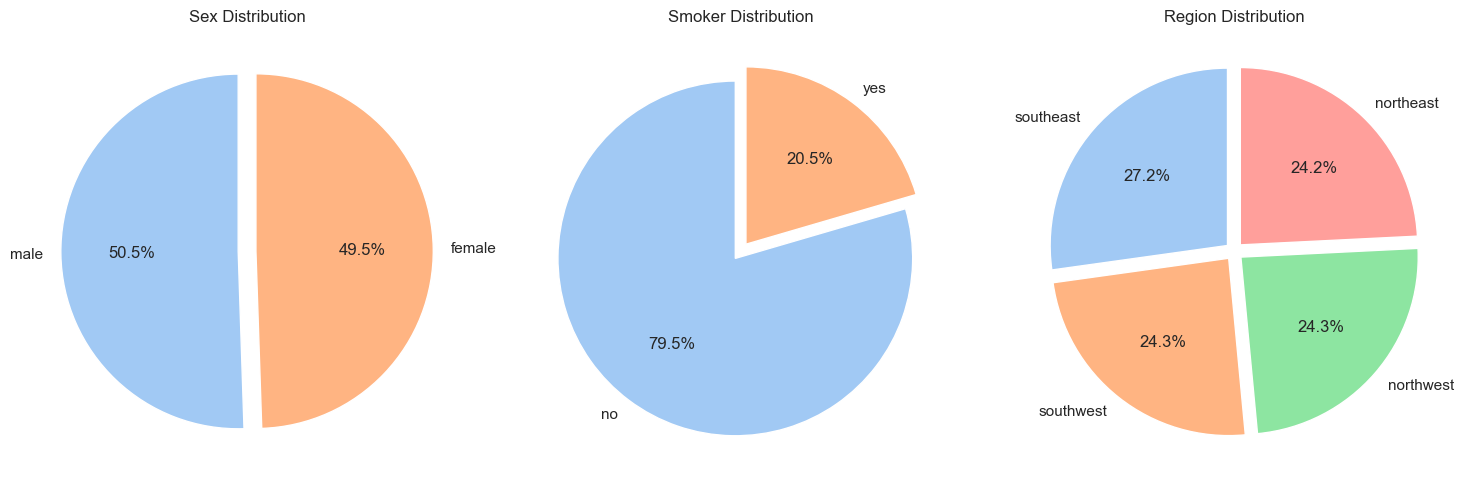

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Set style
# sns.set(style="darkgrid")

# Define explode values for 3D effect
explode_sex = (0.05, 0.05)  # Two slices in the 'sex' pie chart
explode_smoker = (0.05, 0.05)  # Two slices in the 'smoker' pie chart
explode_region = (0.05, 0.05, 0.05, 0.05)  # Four slices in the 'region' pie chart

# Pie chart for 'sex'
sns.set_palette("pastel")
sex_counts = insurance_df['sex'].value_counts()
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, explode=explode_sex)
axes[0].set_title("Sex Distribution")

# Pie chart for 'smoker'
sns.set_palette("muted")
smoker_counts = insurance_df['smoker'].value_counts()
axes[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, explode=explode_smoker)
axes[1].set_title("Smoker Distribution")

# Pie chart for 'region'
sns.set_palette("dark")
region_counts = insurance_df['region'].value_counts()
axes[2].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, explode=explode_region)
axes[2].set_title("Region Distribution")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Smokers Analysis 

**Observations:** 

Evidently, individuals who smoke tend to incur higher charges.

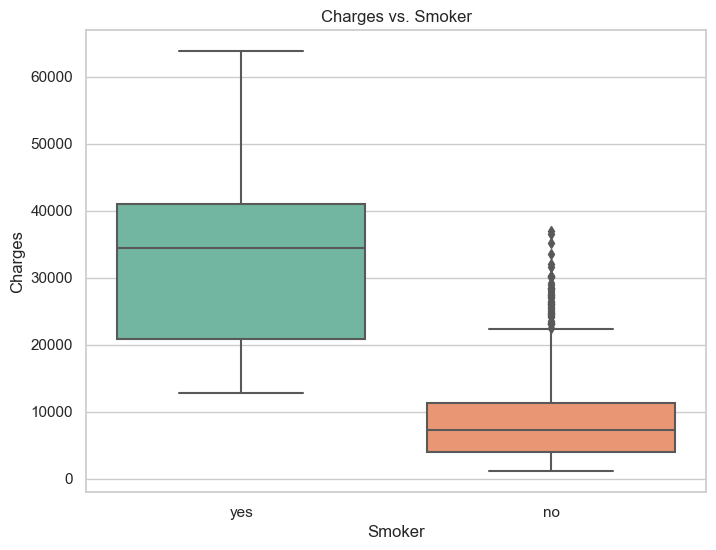

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of charges vs. smoker
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_df, palette='Set2')
plt.title('Charges vs. Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


### How charges vary for smokers, sex and region

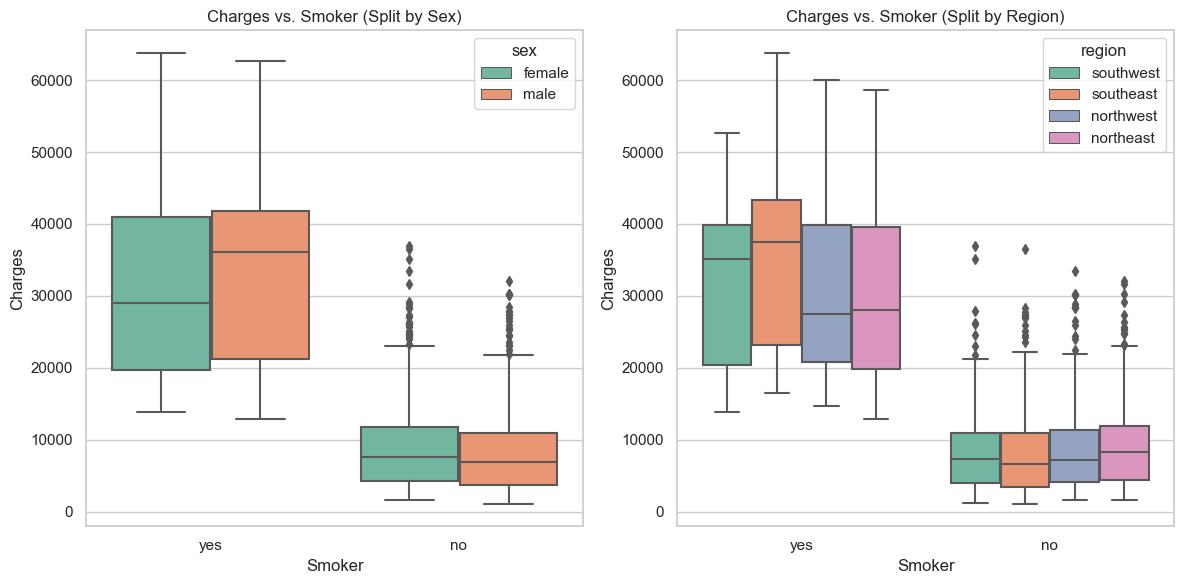

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot grid for charges vs. smoker, with 'sex' and 'region' as additional dimensions
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', hue='sex', data=insurance_df, palette='Set2', ax=plt.subplot(121))
plt.title('Charges vs. Smoker (Split by Sex)')
plt.xlabel('Smoker')
plt.ylabel('Charges')

sns.boxplot(x='smoker', y='charges', hue='region', data=insurance_df, palette='Set2', ax=plt.subplot(122))
plt.title('Charges vs. Smoker (Split by Region)')
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


## Numerical Feature Analysis

### Age Distribution

**Observation:** 

Age is uniformaly distributed

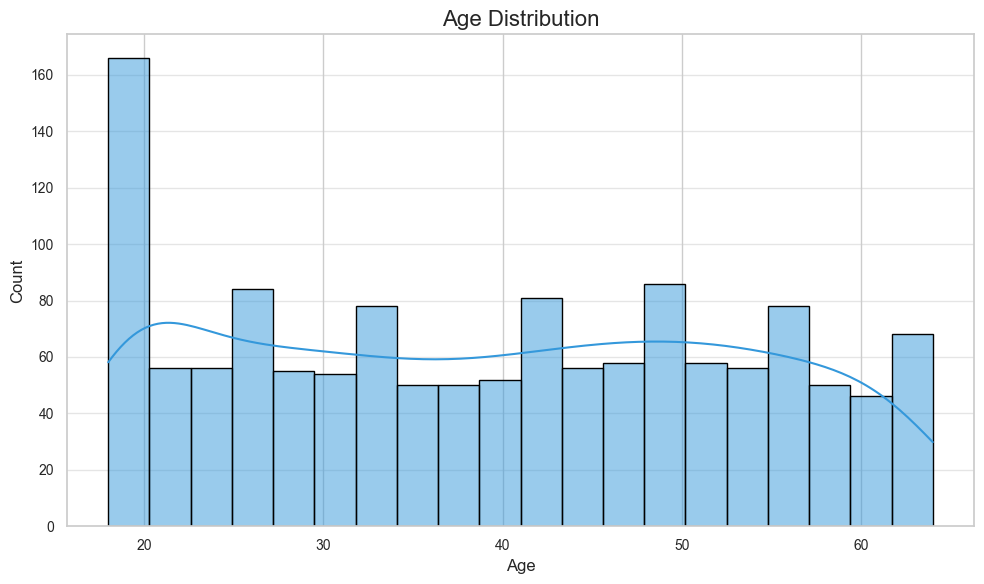

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
# Set style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.histplot(data=insurance_df, x='age', bins=20, kde=True, color='#3498db', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize grid and ticks
plt.grid(axis='y', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Age Vs Charges

#### Scatter Plot

**Observation**: There is an upward trend, albeit not a pronounced one.

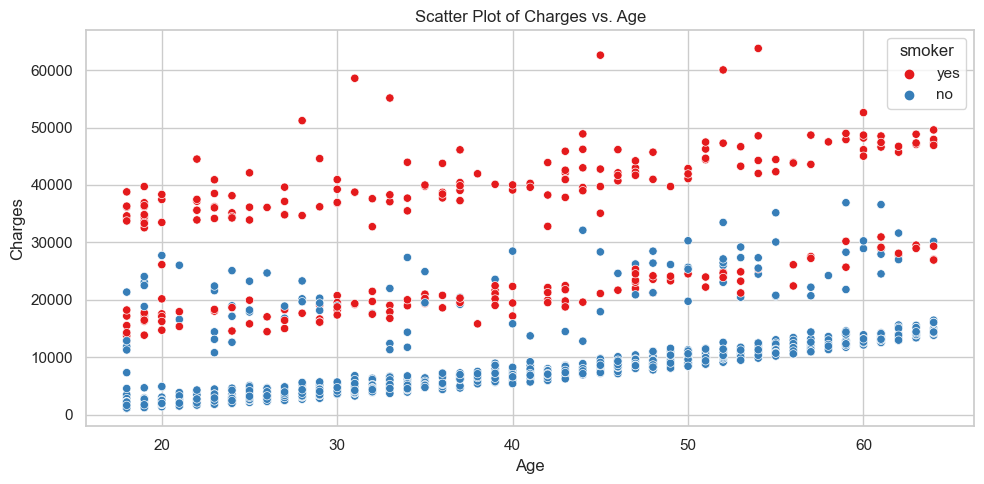

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of charges vs. age
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='charges', data=insurance_df, hue='smoker', palette='Set1')
plt.title('Scatter Plot of Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


#### Regression Plot

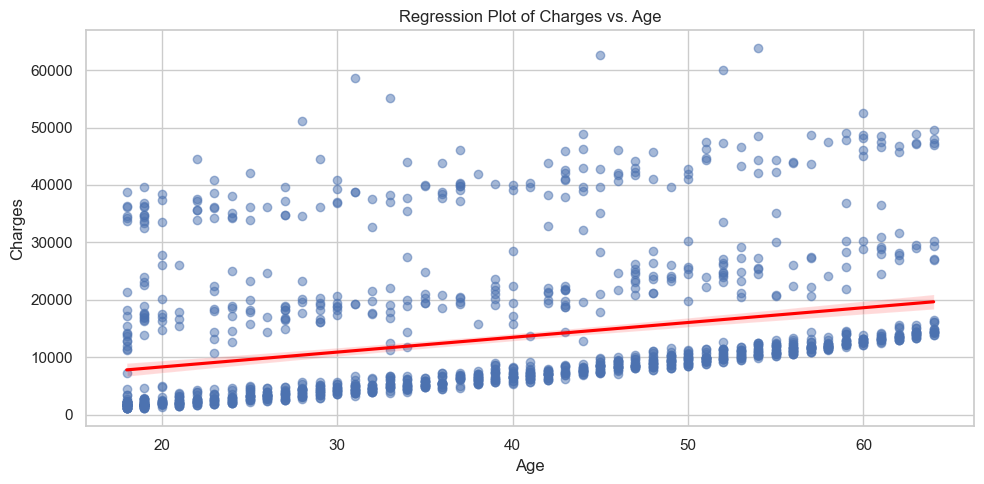

In [8]:
# Create a regression plot of charges vs. age
plt.figure(figsize=(10, 5))
sns.regplot(x='age', y='charges', data=insurance_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot of Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


### BMI effect on Charges

#### Scatter plot

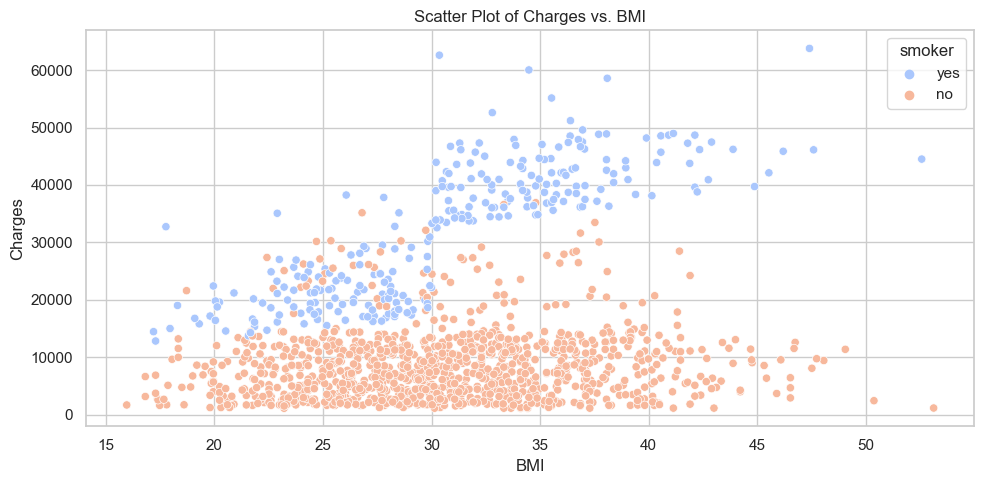

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of charges vs. bmi
plt.figure(figsize=(10, 5))
sns.scatterplot(x='bmi', y='charges', data=insurance_df, hue='smoker', palette='coolwarm')
plt.title('Scatter Plot of Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


#### Regression Plot

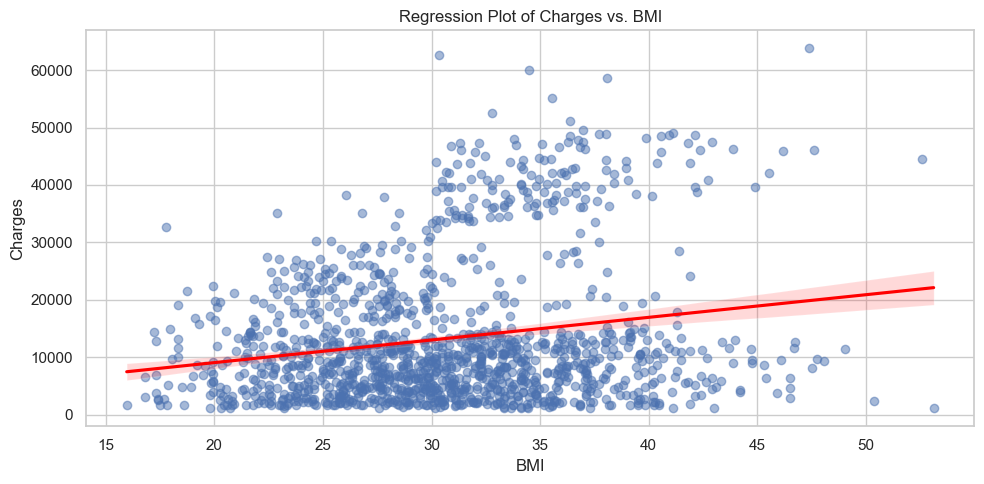

In [10]:
# Create a regression plot of charges vs. bmi
plt.figure(figsize=(10, 5))
sns.regplot(x='bmi', y='charges', data=insurance_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot of Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


# Preprocessing 

## Null Value Analsysis and Treatment
**Observation:**

There are no null values in the dataset.

In [41]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Split Data Into Train(80%) and Test(20%)

In [42]:
from sklearn.model_selection import train_test_split

predictors = insurance_df.drop(labels=['charges'], axis=1)
target = insurance_df['charges']

train_predictors, test_predictors, train_target, test_target = train_test_split(predictors,target, test_size=0.2, random_state=1)

print_line()
print('Train predictor size: ', train_predictors.shape)
print('Train target size:', test_target.shape)
print_line()
print('Test predictor size:', test_predictors.shape)
print('Test target size:', test_target.shape)
print_line()



Train predictor size:  (1070, 6)
Train target size: (268,)


Test predictor size: (268, 6)
Test target size: (268,)




## Create a Data Preprocessing Pipeline

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the transformers
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'region', 'smoker']

# Transformations for each group of columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)])


# Modeling 

## Create a Model 

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Create a full pipeline including preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor())])

from sklearn.ensemble import RandomForestRegressor

## Train The Model 

In [45]:
pipeline.fit(train_predictors, train_target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'region',
                                                   'smoker'])])),
                ('classifier', RandomForestRegressor())])

# Model Learning Curve 

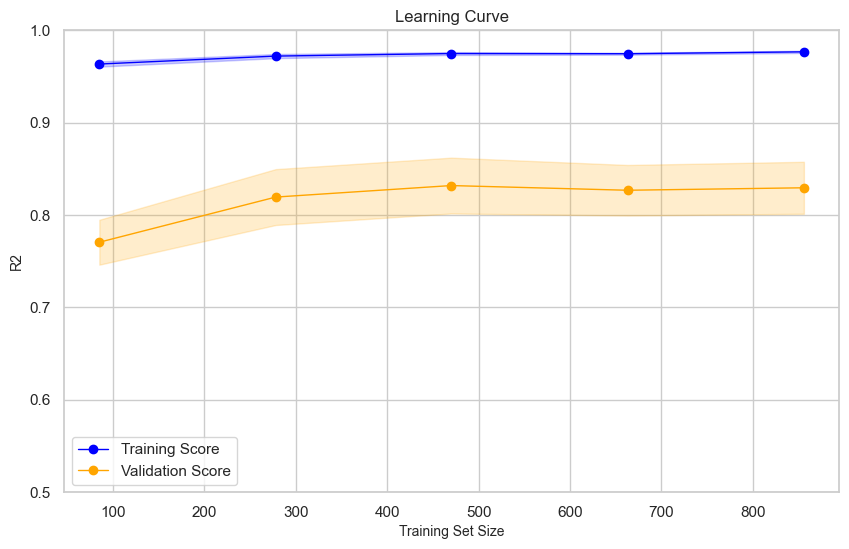

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from numpy import sqrt

# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(pipeline, train_predictors, train_target, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o', linewidth=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange', marker='o', linewidth=1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='orange')
plt.xlabel('Training Set Size', fontsize=10)
plt.ylabel('R2', fontsize=10)
plt.title('Learning Curve', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Set the y-axis limit from 0 to 1
plt.ylim(0.5, 1)

# Set the y-axis tick format as whole numbers
plt.ticklabel_format(axis='y', style='plain')

plt.savefig("Insurence Learning Curve.jpg")
plt.show()

# Model Evaluation

## Evaluate Model on Test Dataset
**Note:**

By default score is r2 for random forest - Best is 1.0

In [19]:
round(pipeline.score(test_predictors, test_target),2)

0.86

## Visualize Predictons 

In [23]:
test_predictions = pipeline.predict(test_predictors)

output_df =  test_predictors.copy()

actual_col = 'Actual Charges'
predicted_col = 'Predicted Charges'
residual_col = 'Residual(Error>1000 (RED))'

output_df[actual_col] = test_target
output_df[predicted_col] = [np.round(pred) for pred in test_predictions]
output_df[residual_col] = abs(output_df[actual_col] - output_df[predicted_col])

out_df = output_df[[actual_col, predicted_col, residual_col]].head(20)

out_df = output_df.head(20) 

out_df.reset_index(drop=True, inplace=True)

# Define a function to map colors to values
def color_map(val):
    # print(val)
    if val > 1000:
        color = 'lightcoral'
    # elif abs(val) < 0:
    #     color = 'lightgreen'
    else:
        color = 'lightblue'
    return f'background-color: {color}'

caption_text = '<h3 style="text-align: center; font-weight: bold; font-size: 16pt"> Insurence Charges <br>( Regression )</h3>'

styled_df = (out_df.style.applymap(color_map, subset=['Residual(Error>1000 (RED))'])
             .set_caption(caption_text)
             .set_properties(**{'border': '1px solid black'})
             .format({'Actual Charges': '{:.2f}', 'Predicted Charges': '{:.2f}', 'Residual(Error>1000 (RED))': '{:.2f}'})
            )

import dataframe_image as dfi
dfi.export(styled_df, 'Insurence Predictions.jpg')

styled_df

,age,sex,bmi,children,smoker,region,Actual Charges,Predicted Charges,Residual(Error>1000 (RED))
0,19,male,35.530000,0,no,northwest,1646.43,1583.00,63.43
1,57,male,31.540000,0,no,northwest,11353.23,12149.00,795.77
2,51,male,37.000000,0,no,southwest,8798.59,9897.00,1098.41
3,49,female,36.630000,3,no,southeast,10381.48,11495.00,1113.52
4,21,male,22.300000,1,no,southwest,2103.08,2223.00,119.92
5,31,male,34.390000,3,yes,northwest,38746.36,40875.00,2128.64
6,49,male,37.510000,2,no,southeast,9304.70,9854.00,549.30
7,56,female,28.595000,0,no,northeast,11658.12,11767.00,108.88
8,27,male,26.030000,0,no,northeast,3070.81,3556.00,485.19
9,37,female,26.400000,0,yes,southeast,19539.24,20190.00,650.76


# Predictions for New Samlples

In [52]:
# Create a DataFrame with two new rows
new_samples = pd.DataFrame({
    'age': [30, 40],        # New age values
    'sex': ['male', 'female'],    # New sex values
    'bmi': [25.5, 30.0],   # New bmi values
    'children': [2, 1],    # New children values
    'smoker': ['yes', 'no'],      # New smoker values
    'region': ['southeast', 'northwest']  # New region values
})

# Make predictions using the pipeline
predictions = pipeline.predict(new_samples)

# Add the predictions to the new_sample DataFrame
new_samples['predicted_charges'] = predictions

# Display the DataFrame with predictions
display(new_samples)


,age,sex,bmi,children,smoker,region,predicted_charges
0,30,male,25.5,2,yes,southeast,19201.3338
1,40,female,30.0,1,no,northwest,6729.8388
